In [ ]:
import os

In [ ]:
ravdess_path = r"dataset/Audio_Speech_Actors_01-24"
ravdess_list_folder = os.listdir(ravdess_path)

In [ ]:
ravdess_list_folder

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

In [ ]:
ravdess_list = []

for sub_folder in ravdess_list_folder:
    sub_folder_list = os.listdir(ravdess_path+"/"+sub_folder)
    for path in sub_folder_list:
        ravdess_list.append(ravdess_path+"/"+sub_folder+"/"+path)



In [ ]:
ravdess_list[:20]

['dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-02-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-02-01-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-02-02-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-01-01-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-01-02-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-02-01-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-02-01-02-02-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-02-02-01-01-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-02-02-01-02-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-02-02-02-01-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-02-02-02-02-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-03-01-01-01-01.wav',
 'dataset/Audio_Speech_Actors_01-24/Actor_01/03-01-03-01-01-02-0

In [ ]:
ravdess_list[6].split('/')[-1]

'03-01-02-01-02-01-01.wav'

In [ ]:
savee_path = r"dataset\AudioData"
savee_list_folder = os.listdir(savee_path)

In [ ]:
savee_list_folder

['DC', 'JE', 'JK', 'KL']

In [ ]:
savee_list = []

for sub_folder in savee_list_folder:
    sub_folder_list = os.listdir(savee_path+"/"+sub_folder)
    for path in sub_folder_list:
        savee_list.append(savee_path+"/"+sub_folder+"/"+path)



In [ ]:
savee_list[:20]

['dataset\\AudioData/DC/a01.wav',
 'dataset\\AudioData/DC/a02.wav',
 'dataset\\AudioData/DC/a03.wav',
 'dataset\\AudioData/DC/a04.wav',
 'dataset\\AudioData/DC/a05.wav',
 'dataset\\AudioData/DC/a06.wav',
 'dataset\\AudioData/DC/a07.wav',
 'dataset\\AudioData/DC/a08.wav',
 'dataset\\AudioData/DC/a09.wav',
 'dataset\\AudioData/DC/a10.wav',
 'dataset\\AudioData/DC/a11.wav',
 'dataset\\AudioData/DC/a12.wav',
 'dataset\\AudioData/DC/a13.wav',
 'dataset\\AudioData/DC/a14.wav',
 'dataset\\AudioData/DC/a15.wav',
 'dataset\\AudioData/DC/d01.wav',
 'dataset\\AudioData/DC/d02.wav',
 'dataset\\AudioData/DC/d03.wav',
 'dataset\\AudioData/DC/d04.wav',
 'dataset\\AudioData/DC/d05.wav']

In [ ]:
savee_list[6].split('/')[-1]

'a07.wav'

In [ ]:
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
import librosa
import glob 
from matplotlib.pyplot import specgram

In [ ]:
def plotAudioSpec(path):
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(15, 5))
    librosa.display.waveplot(data, sr=sampling_rate)

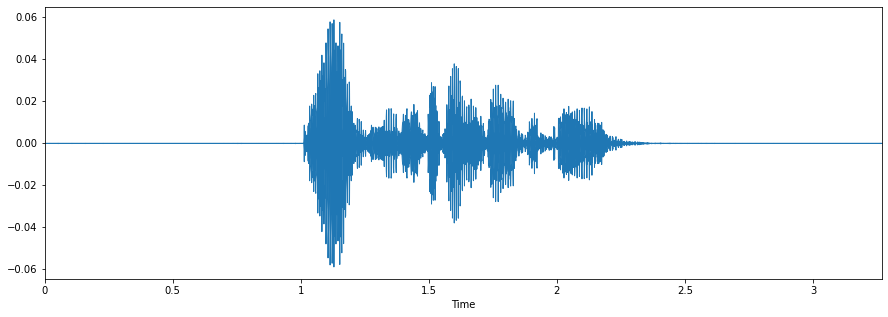

In [ ]:
plotAudioSpec(ravdess_list[2])

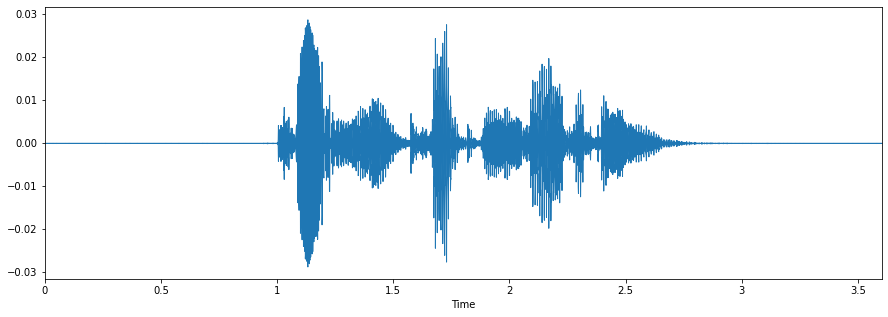

In [ ]:
plotAudioSpec(ravdess_list[5])

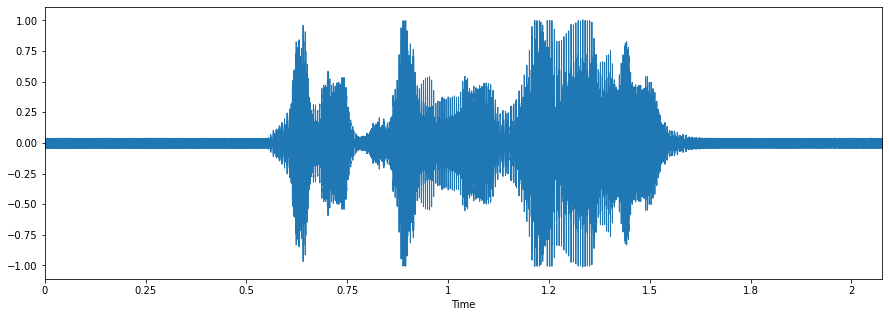

In [ ]:
plotAudioSpec(savee_list[2])

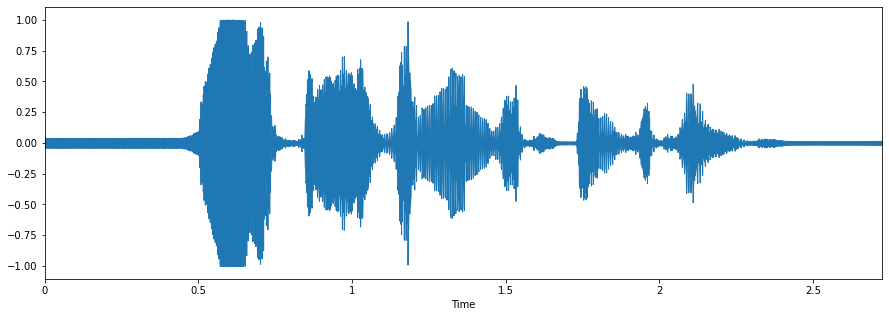

In [ ]:
plotAudioSpec(savee_list[3])

In [ ]:
print('There are ',len(ravdess_list),'files in RADVESS')

There are  1440 files in RADVESS


In [ ]:
print('There are ',len(savee_list),'files in SAVEE')

There are  480 files in SAVEE


In [ ]:
import matplotlib.pyplot as plt
import scipy.io.wavfile
import numpy as np
import sys

In [ ]:

sr,x = scipy.io.wavfile.read(savee_list[3])

## Parameters: 10ms step, 30ms window
nstep = int(sr * 0.01)
nwin  = int(sr * 0.03)
nfft = nwin

window = np.hamming(nwin)

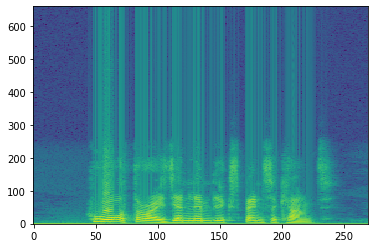

In [ ]:
nn = range(nwin, len(x), nstep)

X = np.zeros( (len(nn), nfft//2) )

for i,n in enumerate(nn):
    xseg = x[n-nwin:n]
    z = np.fft.fft(window * xseg, nfft)
    X[i,:] = np.log(np.abs(z[:nfft//2]))

plt.imshow(X.T, interpolation='nearest',
    origin='lower',
    aspect='auto')

plt.show()

In [ ]:
# Setting the labels of files

In [ ]:
all_files_path =  savee_list + ravdess_list
    

In [ ]:
len(all_files_path)

1920

In [ ]:
all_files_feeling_list=[]


for item in all_files_path:
    item = item.split('/')[-1]
    if item[6:-16]=='02' and int(item[18:-4])%2==0:
        all_files_feeling_list.append('female_calm')
    elif item[6:-16]=='02' and int(item[18:-4])%2==1:
        all_files_feeling_list.append('male_calm')
    elif item[6:-16]=='03' and int(item[18:-4])%2==0:
        all_files_feeling_list.append('female_happy')
    elif item[6:-16]=='03' and int(item[18:-4])%2==1:
        all_files_feeling_list.append('male_happy')
    elif item[6:-16]=='04' and int(item[18:-4])%2==0:
        all_files_feeling_list.append('female_sad')
    elif item[6:-16]=='04' and int(item[18:-4])%2==1:
        all_files_feeling_list.append('male_sad')
    elif item[6:-16]=='05' and int(item[18:-4])%2==0:
        all_files_feeling_list.append('female_angry')
    elif item[6:-16]=='05' and int(item[18:-4])%2==1:
        all_files_feeling_list.append('male_angry')
    elif item[6:-16]=='06' and int(item[18:-4])%2==0:
        all_files_feeling_list.append('female_fearful')
    elif item[6:-16]=='06' and int(item[18:-4])%2==1:
        all_files_feeling_list.append('male_fearful')
    elif item[:1]=='a':
        all_files_feeling_list.append('male_angry')
    elif item[:1]=='f':
        all_files_feeling_list.append('male_fearful')
    elif item[:1]=='h':
        all_files_feeling_list.append('male_happy')
#     elif item[:1]=='n':
#         all_files_feeling_list.append('neutral')
    elif item[:2]=='sa':
        all_files_feeling_list.append('male_sad')

In [ ]:
labels = pd.DataFrame(all_files_feeling_list)


In [ ]:
labels[:100]


,0
0,male_angry
1,male_angry
2,male_angry
3,male_angry
4,male_angry
5,male_angry
6,male_angry
7,male_angry
8,male_angry
9,male_angry


In [ ]:
mylist = []
for item in all_files_path:
    mylist.append(item.split('/')[-1])

In [ ]:
len(mylist)

1920

In [ ]:
mylist[:10],all_files_path[:10]

(['a01.wav',
  'a02.wav',
  'a03.wav',
  'a04.wav',
  'a05.wav',
  'a06.wav',
  'a07.wav',
  'a08.wav',
  'a09.wav',
  'a10.wav'],
 ['dataset\\AudioData/DC/a01.wav',
  'dataset\\AudioData/DC/a02.wav',
  'dataset\\AudioData/DC/a03.wav',
  'dataset\\AudioData/DC/a04.wav',
  'dataset\\AudioData/DC/a05.wav',
  'dataset\\AudioData/DC/a06.wav',
  'dataset\\AudioData/DC/a07.wav',
  'dataset\\AudioData/DC/a08.wav',
  'dataset\\AudioData/DC/a09.wav',
  'dataset\\AudioData/DC/a10.wav'])

In [ ]:
# Getting the features of audio files using librosa

df = pd.DataFrame(columns=['feature'])
bookmark=0
for index,y in enumerate(mylist):
    if mylist[index][6:-16]!='01' and mylist[index][6:-16]!='07' and mylist[index][6:-16]!='08' and mylist[index][:2]!='su' and mylist[index][:1]!='n' and mylist[index][:1]!='d':
        X, sample_rate = librosa.load(all_files_path[index], res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X,  sr=sample_rate,  n_mfcc=13), axis=0)
        feature = mfccs
        df.loc[bookmark] = [feature]
        bookmark=bookmark+1 

In [ ]:
len(df)

1200

In [ ]:
df3 = pd.DataFrame(df['feature'].values.tolist())

In [ ]:
newdf = pd.concat([df3,labels], axis=1)

In [ ]:
rnewdf = newdf.rename(index=str, columns={"0": "label"})

In [ ]:
rnewdf[:5]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
0,-11.113932,-7.215755,-6.219190,-5.926544,-5.850418,-4.808960,-2.513002,-3.500537,-3.721046,-4.487559,...,-5.023863,-5.254715,-5.234094,-5.310308,-5.621664,-6.072197,-6.611348,-2.509089,1.964608,male_angry
1,-24.449831,-22.465742,-22.928043,-23.243809,-22.926605,-23.432241,-14.830003,-8.285514,-4.114430,-2.962486,...,-22.633406,-22.511597,-24.300159,-24.496813,-22.895985,-23.511509,-24.342152,-24.530264,-25.457798,male_angry
2,-25.000114,-24.520254,-24.178185,-23.847450,-15.182783,-10.732484,-8.681472,-8.655434,-7.889996,-6.692607,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_angry
3,-1.529839,-4.333436,-12.285237,-13.083024,-12.041327,-11.819768,-9.414148,-8.153646,-11.953334,-9.900553,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_angry
4,-22.458635,-22.467834,-25.884359,-27.827044,-27.593529,-26.666508,-18.659023,-11.698081,-10.721751,-11.915208,...,-25.854910,-26.821350,-25.436453,-24.179941,-23.281618,-24.167494,-25.228062,-25.902941,-25.589964,male_angry


In [ ]:
rnewdf.to_csv('rnewdf.csv')

In [ ]:
len(rnewdf)

1200

In [ ]:
rnewdf.isnull().sum().sum()

2209

In [ ]:
clean_df = rnewdf.reset_index(drop=True)

In [ ]:
len(clean_df)

1200

In [ ]:
clean_df.isnull().sum().sum()

2209

In [ ]:
# clean_df = rnewdf.dropna()

In [ ]:
# clean_df[:5]

In [ ]:
# len(clean_df)

In [ ]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,207,208,209,210,211,212,213,214,215,0
288,-57.672386,-58.346806,-58.554077,-57.433384,-56.866211,-57.498203,-57.134193,-57.447025,-57.418476,-57.487686,...,-54.916096,-54.858940,-56.772697,-55.587261,-54.187275,-52.968323,-53.157589,-52.669109,-52.821976,female_happy
40,-5.412477,-6.760818,-9.715000,-10.901871,-10.930171,-11.509630,-11.383668,-11.377580,-10.658082,-7.542358,...,-12.720633,-12.530707,-11.047561,-10.174129,-8.591426,-8.287189,-8.286091,-10.920873,-11.975821,male_happy
1099,-52.832336,-52.688438,-52.211685,-51.576748,-51.757809,-51.686871,-52.709007,-53.476116,-54.586891,-56.060482,...,-51.755314,-52.064903,-49.577900,-49.165909,-49.457909,-51.753365,-53.608818,-53.711086,-52.081234,female_sad
995,-45.133114,-45.986202,-47.102135,-47.071896,-50.197021,-50.810013,-50.140190,-50.094822,-52.950752,-53.276470,...,-51.100155,-50.897766,-50.474586,-49.177994,-48.331749,-49.057755,-47.925785,-48.229755,-51.377739,male_fearful
1100,-58.361904,-57.364544,-55.829670,-56.212971,-56.305969,-50.616493,-48.076084,-50.597900,-53.244297,-52.297489,...,-51.827152,-50.874004,-49.967148,-50.748989,-53.646519,-57.466526,-56.044880,-56.567177,-56.758747,female_sad
1050,-55.943672,-55.943672,-55.943672,-55.542545,-55.430832,-52.677505,-52.143353,-53.764061,-53.548458,-51.338737,...,-44.527527,-45.046543,-46.768936,-47.487576,-46.356548,-46.441891,-46.202534,-47.446404,-50.004128,male_happy
820,-48.389320,-48.952263,-49.989380,-50.773804,-49.990219,-50.252659,-50.450272,-50.274849,-52.041180,-52.054520,...,-41.198826,-42.128616,-43.413486,-43.139751,-42.195766,-43.316048,-45.948830,-43.787823,-42.815292,male_sad
622,-54.114265,-51.924953,-52.172348,-50.519962,-50.306618,-52.732296,-50.104778,-50.054977,-49.923176,-51.393005,...,-44.503819,-44.039238,-44.882706,-46.700562,-47.118050,-46.384579,-46.734627,-47.983723,-46.864223,female_sad
588,-43.826744,-44.310905,-44.328308,-44.203773,-44.118374,-44.075668,-43.239174,-43.239971,-43.038307,-42.939907,...,-20.941551,-25.617258,-26.698870,-25.630836,-28.005306,-30.681026,-32.177219,-31.612103,-30.871141,male_angry
445,-70.692863,-69.985153,-71.187737,-70.811371,-69.813614,-69.616936,-68.459938,-70.129707,-72.018173,-72.018173,...,-45.056293,-45.750526,-44.787312,-43.502945,-44.521019,-44.736515,-45.162479,-44.443619,-45.885376,female_calm


In [ ]:
rnewdf=rnewdf.fillna(0)

In [ ]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [ ]:
trainfeatures = train.iloc[:, :-1]

In [ ]:
trainlabel = train.iloc[:, -1:]

In [ ]:
testfeatures = test.iloc[:, :-1]

In [ ]:
testlabel = test.iloc[:, -1:]

In [ ]:
test[10]

40      -7.854832
1099   -55.833042
995    -53.386803
1136   -68.674118
975    -61.780830
55     -26.949760
5       -7.768034
705    -56.331951
127    -20.342022
687    -68.439621
388    -43.798508
799    -48.647118
103    -24.594036
738    -66.946083
1196   -44.552925
760    -66.608246
811    -54.909195
535    -50.618351
604    -46.946121
863    -62.068012
540    -49.817043
39      -9.266990
991    -46.687786
547    -56.320541
753    -62.252018
468    -39.164246
223    -35.541641
1181   -58.602398
1176   -64.688896
320    -65.482498
          ...    
229    -26.977602
1124   -58.376591
199    -24.365360
1109   -50.196846
1111   -46.864986
1082   -56.111122
1096   -62.252403
652    -48.336937
970    -59.941391
916    -39.703220
267    -54.089451
386    -55.958439
645    -71.940353
844    -62.749626
473    -67.113167
1161   -71.407066
793    -64.202377
151    -17.828186
57     -25.849937
541    -50.595520
301    -65.646355
1054   -51.827988
369    -60.418480
589    -43.828533
986    -54